In [96]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



Separando nosso dados em dois periodos:

1 - Pré Pandemico (2015-2019) - Importante para analisarmos um mercado estavável

2 - Pandemico e pós pandemico (2020 - 2023) - Importante para analisarmos o mercado em máximo estresse.

Primeiro periodo - Pré Pandemico (2015 - 2019)

In [97]:
# Tickers indice-pais
tickers = ['EWZ', 'EWJ', 'ERUS', 'INDA', 'FXI', 'SPY'] # Brasil, Japão, Russia, India, China, S&P 500. Respectivamente.

Brics = ['EWZ' , 'FXI', 'ERUS', 'INDA']

Desenvolvidos = ['EWJ' , 'SPY']

Variaveis = ['Close', 'Open', 'High', 'Low', 'Volume']

# Intervalo de datas 
start_date = '2015-01-01'
end_date = '2019-12-31'


# Dados históricos dos tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Transformar MultiIndex em colunas normais
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

#Acertando datas 
data.index = pd.to_datetime(data.index)

Return_percent_day = data.pct_change().dropna()  # Calcula a variação percentual diária de cada variavel (coluna) - Retornos Diários

mean_return = Return_percent_day.mean()
std_dev = Return_percent_day.std()
coef_var = std_dev / mean_return

display(data)

display(Return_percent_day)

C:\Users\patri\AppData\Local\Temp\ipykernel_29204\133590888.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  6 of 6 completed


,Close_ERUS,Close_EWJ,Close_EWZ,Close_FXI,Close_INDA,Close_SPY,High_ERUS,High_EWJ,High_EWZ,High_FXI,...,Open_EWZ,Open_FXI,Open_INDA,Open_SPY,Volume_ERUS,Volume_EWJ,Volume_EWZ,Volume_FXI,Volume_INDA,Volume_SPY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,11.980782,37.731197,21.287268,32.234905,26.768723,171.568039,12.158507,38.099796,21.672557,32.598400,...,21.660517,32.575196,26.865615,172.361456,255090,7191725,17765400,15879100,654400,121465900
2015-01-05,11.499880,37.295582,20.558832,32.118893,26.337116,168.469574,12.085329,37.530144,20.715355,32.474654,...,20.600973,32.459186,26.645411,170.515727,409876,8672550,22200400,19953500,431300,169632600
2015-01-06,11.478971,36.692413,20.926062,31.724470,25.535553,166.882767,11.782151,37.161541,21.064527,32.180771,...,20.841780,32.095697,25.746954,168.778583,155056,8184950,21194000,23651100,812600,209151400
2015-01-07,11.928509,37.228561,21.491957,32.559738,26.037632,168.962311,12.053962,37.429617,21.732762,32.606143,...,21.522057,32.451464,25.870274,168.219014,138434,9584500,16427500,21729100,537300,125346700
2015-01-08,12.702137,37.697693,21.835104,32.822689,26.733490,171.960571,12.932135,37.764713,22.015708,32.954167,...,21.636438,32.760819,26.636597,170.382109,429999,5003275,14081000,14266300,478300,147217800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,23.217928,54.305950,31.858570,37.947330,32.792374,296.042542,23.239983,54.342294,31.885859,38.017863,...,31.797172,37.912063,32.829470,296.383536,117253,3941900,25643900,8697800,3713100,52990000
2019-12-24,23.350254,54.087883,31.831285,38.017864,32.671818,296.051727,23.388849,54.169656,31.899504,38.061947,...,31.865395,38.000230,32.727462,296.272907,101330,3726900,2671200,4769900,1784100,20270000
2019-12-26,23.399876,54.233261,32.533947,38.396992,32.514160,297.627747,23.421931,54.251433,32.533947,38.414626,...,32.083697,38.176573,32.579077,296.438850,52359,3554300,18172400,10652800,1564100,30911200


,Close_ERUS,Close_EWJ,Close_EWZ,Close_FXI,Close_INDA,Close_SPY,High_ERUS,High_EWJ,High_EWZ,High_FXI,...,Open_EWZ,Open_FXI,Open_INDA,Open_SPY,Volume_ERUS,Volume_EWJ,Volume_EWZ,Volume_FXI,Volume_INDA,Volume_SPY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.040139,-0.011545,-0.034219,-0.003599,-0.016124,-0.018060,-0.006019,-0.014952,-0.044167,-0.003796,...,-0.048916,-0.003561,-0.008197,-0.010708,0.606790,0.205907,0.249643,0.256589,-0.340923,0.396545
2015-01-06,-0.001818,-0.016173,0.017862,-0.012280,-0.030435,-0.009419,-0.025086,-0.009822,0.016856,-0.009050,...,0.011689,-0.011198,-0.033719,-0.010188,-0.621700,-0.056223,-0.045333,0.185311,0.884071,0.232967
2015-01-07,0.039162,0.014612,0.027043,0.026329,0.019662,0.012461,0.023070,0.007214,0.031723,0.013218,...,0.032640,0.011085,0.004790,-0.003315,-0.107200,0.170991,-0.224899,-0.081265,-0.338789,-0.400689
2015-01-08,0.064855,0.012601,0.015966,0.008076,0.026725,0.017745,0.072853,0.008953,0.013019,0.010674,...,0.005315,0.009533,0.029622,0.012859,2.106166,-0.477983,-0.142840,-0.343447,-0.109808,0.174485
2015-01-09,-0.031276,-0.010667,-0.002757,-0.003770,0.004942,-0.008014,-0.039612,-0.002662,-0.005742,0.000469,...,0.004730,0.005429,0.015212,0.011715,-0.604660,1.175420,-0.325439,0.259338,-0.039097,0.077093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.004293,-0.000836,0.009729,-0.000929,-0.002539,0.001528,0.001663,-0.001669,0.005810,-0.002083,...,0.005176,-0.001394,-0.003098,0.003526,-0.537724,-0.388492,-0.129727,-0.667067,0.102301,-0.639872
2019-12-24,0.005699,-0.004016,-0.000856,0.001859,-0.003676,0.000031,0.006406,-0.003177,0.000428,0.001160,...,0.002146,0.002326,-0.003107,-0.000373,-0.135800,-0.054542,-0.895835,-0.451597,-0.519512,-0.617475
2019-12-26,0.002125,0.002688,0.022075,0.009972,-0.004825,0.005323,0.001414,0.001510,0.019889,0.009266,...,0.006851,0.004641,-0.004534,0.000560,-0.483282,-0.046312,5.803085,1.233338,-0.123311,0.524973


Coefiente de varição Pearson -  Alocados nas variaveis CLOSE, LOW e HIGH (Tentaremos verificar se qual a influencias entre os mercados)

Fazedo uma correlação de retorno - Todas as variaveis 

,Close_ERUS,Close_EWJ,Close_EWZ,Close_FXI,Close_INDA,Close_SPY,High_ERUS,High_EWJ,High_EWZ,High_FXI,...,Open_EWZ,Open_FXI,Open_INDA,Open_SPY,Volume_ERUS,Volume_EWJ,Volume_EWZ,Volume_FXI,Volume_INDA,Volume_SPY
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.040139,-0.011545,-0.034219,-0.003599,-0.016124,-0.018060,-0.006019,-0.014952,-0.044167,-0.003796,...,-0.048916,-0.003561,-0.008197,-0.010708,0.606790,0.205907,0.249643,0.256589,-0.340923,0.396545
2015-01-06,-0.001818,-0.016173,0.017862,-0.012280,-0.030435,-0.009419,-0.025086,-0.009822,0.016856,-0.009050,...,0.011689,-0.011198,-0.033719,-0.010188,-0.621700,-0.056223,-0.045333,0.185311,0.884071,0.232967
2015-01-07,0.039162,0.014612,0.027043,0.026329,0.019662,0.012461,0.023070,0.007214,0.031723,0.013218,...,0.032640,0.011085,0.004790,-0.003315,-0.107200,0.170991,-0.224899,-0.081265,-0.338789,-0.400689
2015-01-08,0.064855,0.012601,0.015966,0.008076,0.026725,0.017745,0.072853,0.008953,0.013019,0.010674,...,0.005315,0.009533,0.029622,0.012859,2.106166,-0.477983,-0.142840,-0.343447,-0.109808,0.174485
2015-01-09,-0.031276,-0.010667,-0.002757,-0.003770,0.004942,-0.008014,-0.039612,-0.002662,-0.005742,0.000469,...,0.004730,0.005429,0.015212,0.011715,-0.604660,1.175420,-0.325439,0.259338,-0.039097,0.077093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.004293,-0.000836,0.009729,-0.000929,-0.002539,0.001528,0.001663,-0.001669,0.005810,-0.002083,...,0.005176,-0.001394,-0.003098,0.003526,-0.537724,-0.388492,-0.129727,-0.667067,0.102301,-0.639872
2019-12-24,0.005699,-0.004016,-0.000856,0.001859,-0.003676,0.000031,0.006406,-0.003177,0.000428,0.001160,...,0.002146,0.002326,-0.003107,-0.000373,-0.135800,-0.054542,-0.895835,-0.451597,-0.519512,-0.617475
2019-12-26,0.002125,0.002688,0.022075,0.009972,-0.004825,0.005323,0.001414,0.001510,0.019889,0.009266,...,0.006851,0.004641,-0.004534,0.000560,-0.483282,-0.046312,5.803085,1.233338,-0.123311,0.524973


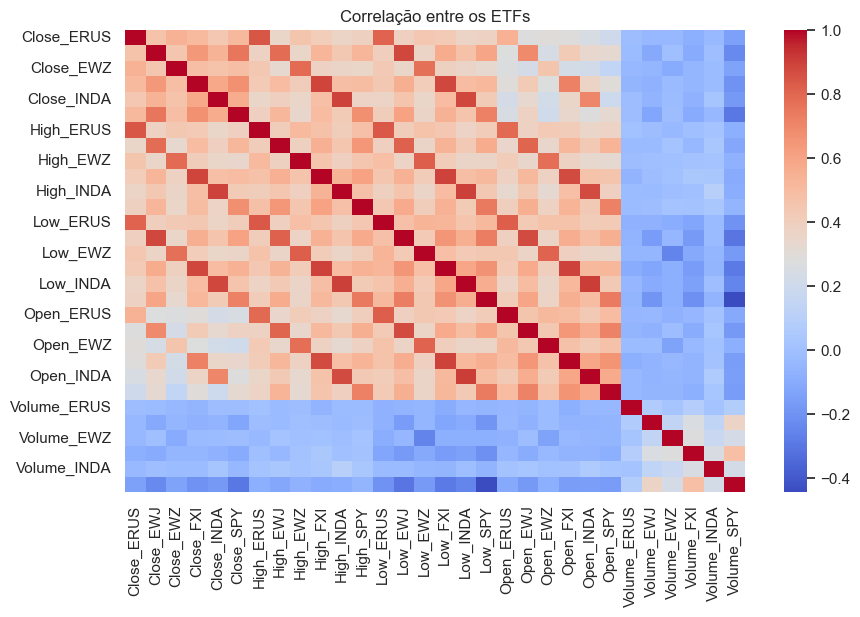

In [98]:
#Todas variaves - Heatmap
display(Return_percent_day)

plt.figure(figsize=(10, 6))
sns.heatmap(Return_percent_day.corr(), cmap='coolwarm')
plt.title('Correlação entre os ETFs')
plt.show()



Apesar de dificil Visualização, podemos inferir algumas coisas:

O Volume negociado é totalmente independente sobre as demais variaveis (Close, Low, High and Open) 

O indice ERUS (Russia) sofre menos influencia de outros mercados (Aparentemente)

Dividindo por Variavel (LOW, HIGH, CLOSE, OPEN, VOLUME)

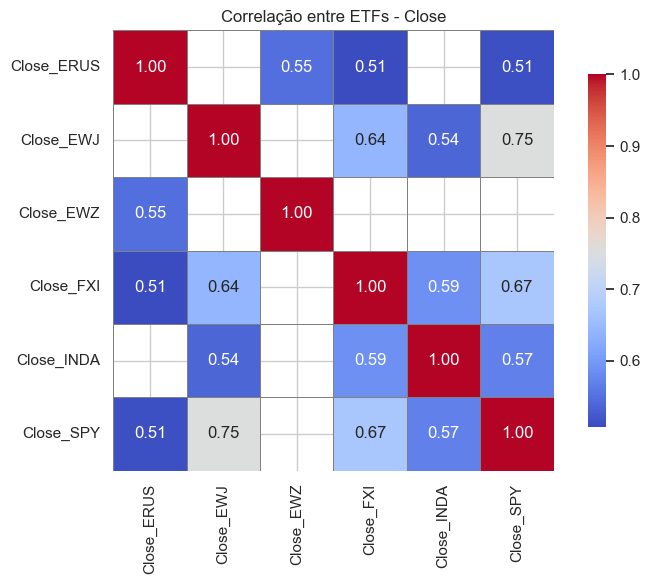

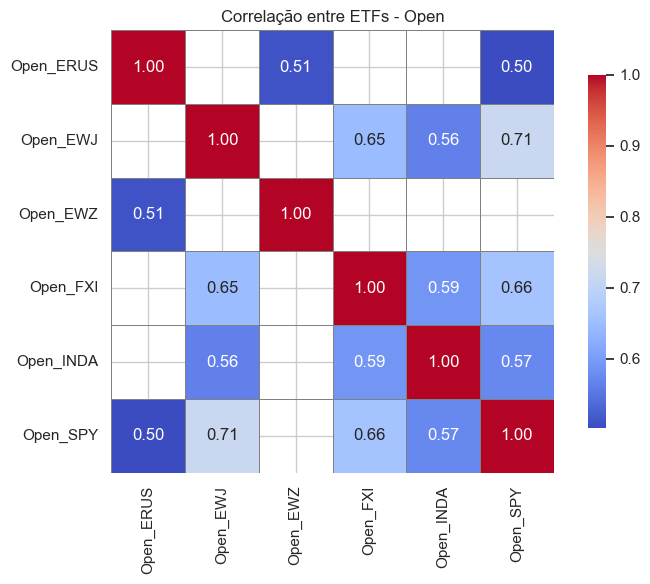

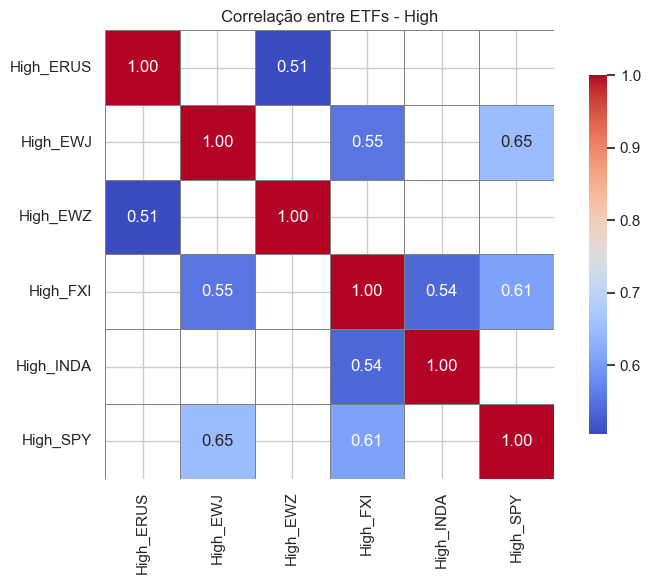

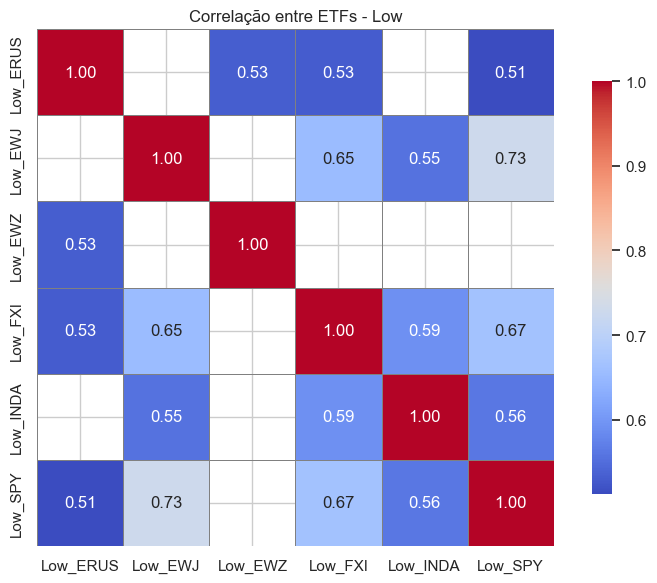

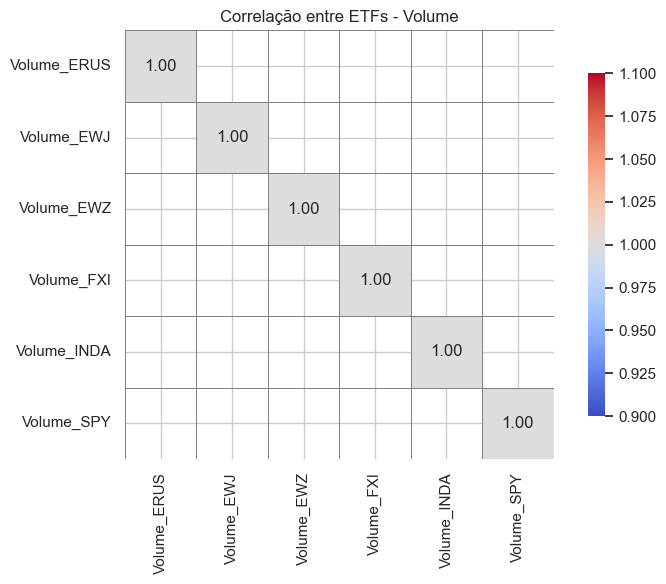

In [ ]:

for tipo in Variaveis:
    subset = data.filter(like=tipo)
    returns = subset.pct_change().dropna()
    corr_matrix = returns.corr()
    mask = corr_matrix.abs() < 0.5
    plt.figure(figsize=(8, 6))

  
    #sns.heatmap(returns.corr(), annot=True, cmap='coolwarm') # Printa todas as correlações


#Tira correlações abaixo de 0.5
    sns.heatmap(corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8})
    plt.title(f'Correlação entre ETFs - {tipo}')
    plt.tight_layout()
    plt.show()

Normalizando o desempenho acumulado (Variações diárias) - Periodo 1


,Close_ERUS,Close_EWZ,Close_EWJ,Close_FXI,Close_INDA,Close_SPY
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,95.986057,96.578069,98.845477,99.640103,98.387647,98.194031
2015-01-06,95.811541,98.303183,97.246883,98.416514,95.393245,97.269146
2015-01-07,99.563695,100.961556,98.667851,101.007706,97.268863,98.481228
2015-01-08,106.020938,102.573540,99.911202,101.823439,99.868382,100.228791
...,...,...,...,...,...,...
2019-12-23,193.793100,149.660213,143.928510,117.721241,122.502572,172.551102
2019-12-24,194.897586,149.532039,143.350561,117.940053,122.052211,172.556456
2019-12-26,195.311763,152.832893,143.735860,119.116192,121.463249,173.475053


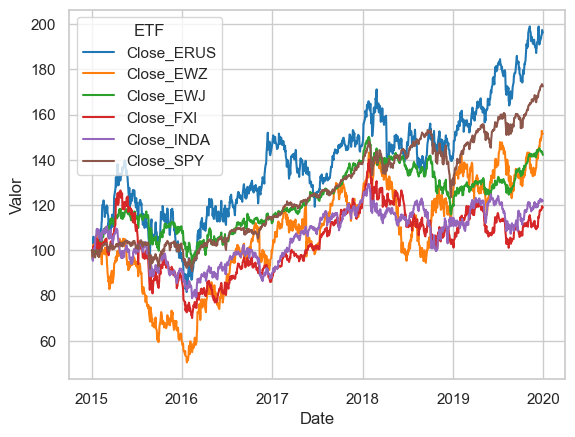

In [100]:
# Reenomeando para facilitação (Acredito que ajudará)
#data.rename(columns=lambda x: x.replace("Adj Close", "AdjClose"), inplace=True)

#Filtrar apenas fechamento
adj_close = data[['Close_ERUS', 'Close_EWZ' , 'Close_EWJ', 'Close_FXI', 'Close_INDA', 'Close_SPY']]

# Normalização para variações percentuais
normalized = adj_close/ adj_close.iloc[0] * 100

#Comparar o desempenho acumulado (matplto)
#normalized.plot(figsize=(12, 6), title='Desempenho acumulado dos ETFs (base 100)')

# Transforma os dados para formato "long" (necessário para seaborn)
normalized_long = normalized.reset_index().melt(id_vars='Date', var_name='ETF', value_name='Valor')

# Cria o gráfico com seaborn
sns.lineplot(data=normalized_long, x='Date', y='Valor', hue='ETF', palette='tab10')


display(normalized)

Volatilidade (risco) de cada ETF

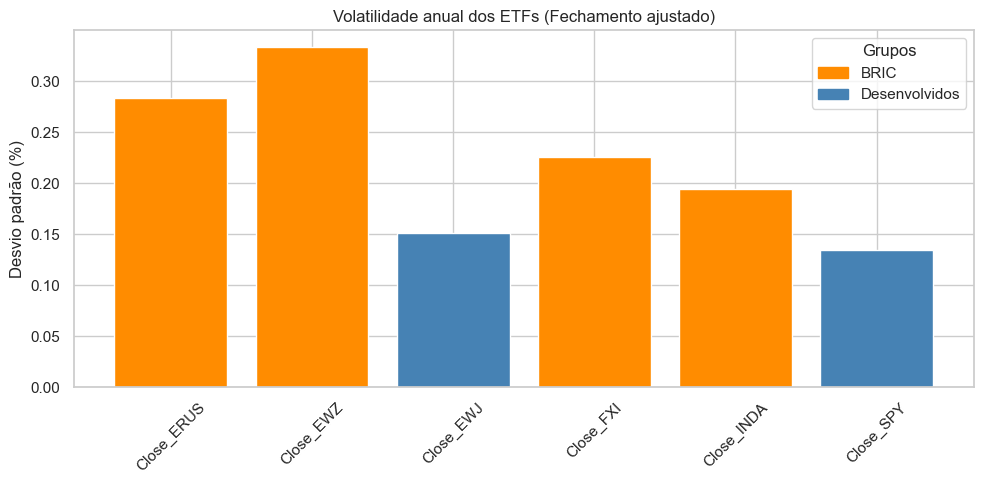

,Volume_ERUS,Volume_EWJ,Volume_EWZ,Volume_FXI,Volume_INDA,Volume_SPY
Date,,,,,,
2015-01-05,0.606790,0.205907,0.249643,0.256589,-0.340923,0.396545
2015-01-06,-0.621700,-0.056223,-0.045333,0.185311,0.884071,0.232967
2015-01-07,-0.107200,0.170991,-0.224899,-0.081265,-0.338789,-0.400689
2015-01-08,2.106166,-0.477983,-0.142840,-0.343447,-0.109808,0.174485
2015-01-09,-0.604660,1.175420,-0.325439,0.259338,-0.039097,0.077093
...,...,...,...,...,...,...
2019-12-23,-0.537724,-0.388492,-0.129727,-0.667067,0.102301,-0.639872
2019-12-24,-0.135800,-0.054542,-0.895835,-0.451597,-0.519512,-0.617475
2019-12-26,-0.483282,-0.046312,5.803085,1.233338,-0.123311,0.524973


Close_ERUS    0.283063
Close_EWZ     0.333143
Close_EWJ     0.150693
Close_FXI     0.226095
Close_INDA    0.193819
Close_SPY     0.134325
dtype: float64

In [104]:
returns_percent_close = adj_close.pct_change().dropna() # retornos percentuais dia - Fechamento

volatility = returns_percent_close.std() * np.sqrt(252)

# Grupos
bric = ['Close_EWZ', 'Close_ERUS', 'Close_FXI', 'Close_INDA']

desenvolvidos = ['Close_SPY', 'Close_EWJ']

# Cores
cores = []
for etf in volatility.index:
    if etf in bric:
        cores.append('darkorange')
    elif etf in desenvolvidos:
        cores.append('steelblue')
    else:
        cores.append('gray')



# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(volatility.index, volatility.values, color=cores)
plt.title('Volatilidade anual dos ETFs (Fechamento ajustado)')
plt.ylabel('Desvio padrão (%)')
plt.grid(True)

# Legenda
legenda = [
    Patch(color='darkorange', label='BRIC'),
    Patch(color='steelblue', label='Desenvolvidos')
]
plt.legend(handles=legenda, title='Grupos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(returns)
display (volatility) 

Tentativa de analisar Retorno x Risco
Mostra o retorno médio e o desvio-padrão lado a lado para cada ativo.


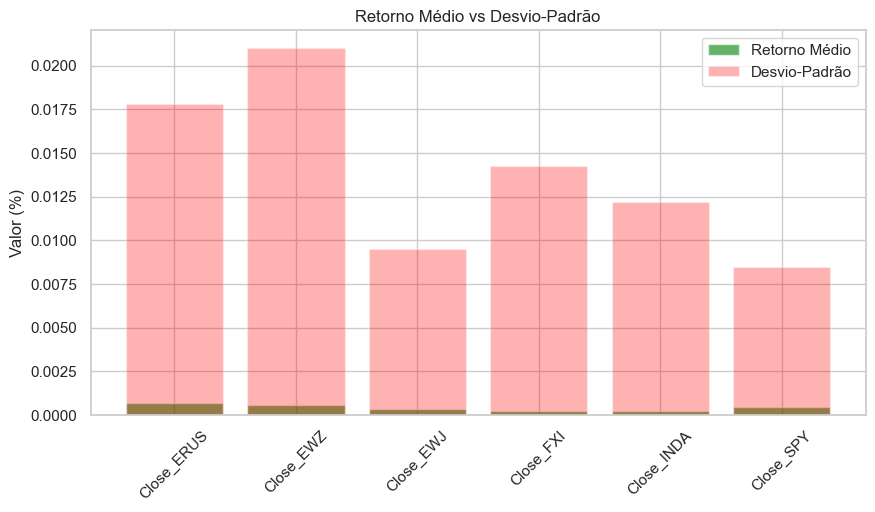

In [105]:
mean_return_close = returns_percent_close.mean()
std_dev_close = returns_percent_close.std()
coef_var_close = std_dev_close / mean_return_close

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(mean_return_close.index, mean_return_close, color='green', alpha=0.6, label='Retorno Médio')
ax.bar(std_dev_close.index, std_dev_close, color='red', alpha=0.3, label='Desvio-Padrão')
ax.set_ylabel('Valor (%)')
ax.set_title('Retorno Médio vs Desvio-Padrão')
ax.legend()
plt.xticks(rotation=45)
plt.show()

Dificil tirar muitas inferencias 

Gráfico de Dispersão (Risco x Retorno)

Bom para avaliar risco e retorno dos ativos


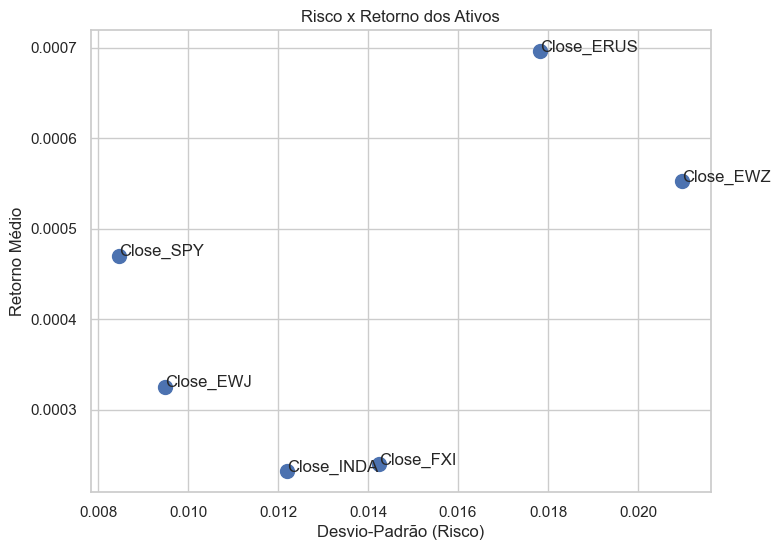

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(std_dev_close, mean_return_close, s=100)

for i in mean_return_close.index:
    plt.annotate(i, (std_dev_close[i], mean_return_close[i]))

plt.xlabel('Desvio-Padrão (Risco)')
plt.ylabel('Retorno Médio')
plt.title('Risco x Retorno dos Ativos')
plt.grid(True)
plt.show()



Altos retornos e riscos para Brasil e Russia

Baixo retorno e riscos moderados para China e India

Moderados retornos e baixo risco para USA e Japão

Coeficiente de variação - Entragas por unidade de risco

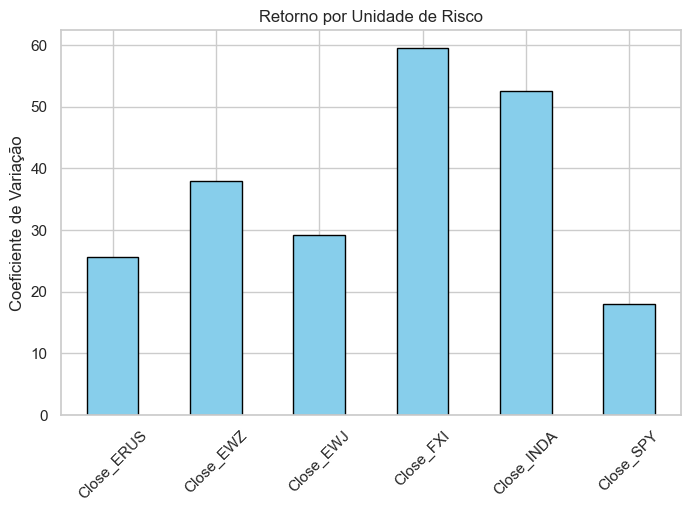

In [108]:
coef_var_close.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.ylabel('Coeficiente de Variação')
plt.title('Retorno por Unidade de Risco')
plt.xticks(rotation=45)
plt.show()

Considerando quanto menor o indice, melhor foi/é desenvolvimento do indice

Segundo Periodo - Pandemico (2020 - 2023)

In [103]:
# Intervalo de datas 
#start_date = '2020-01-01'
#end_date = '2023-12-31'

# Dados históricos dos tickers
data = yf.download(tickers, start=start_date, end=end_date)

# Transformar MultiIndex em colunas normais
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

#Acertando datas 
data.index = pd.to_datetime(data.index)

# Reenomeando para facilitação (Acredito que ajudará)
data.rename(columns=lambda x: x.replace("Adj Close", "AdjClose"), inplace=True)

#display(data)

C:\Users\patri\AppData\Local\Temp\ipykernel_29204\2223617553.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  6 of 6 completed
